In [1]:
from scipy import misc
import numpy as np

In [3]:
face = misc.face(gray=True)
print(face.shape)

C:\Users\barta\AppData\Local\Temp\ipykernel_6340\216374759.py:1: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True)


(768, 1024)


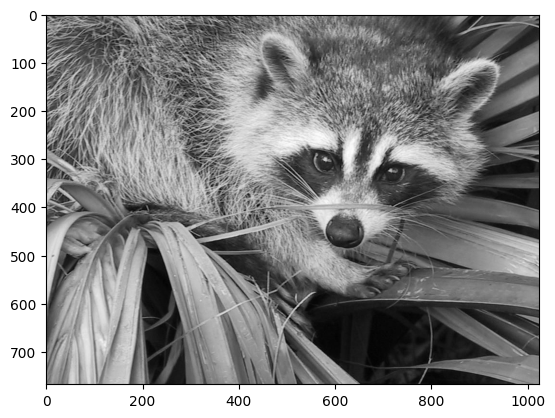

In [4]:
import matplotlib.pyplot as plt
plt.imshow(face, cmap=plt.cm.gray)

(array([2.900e+01, 6.600e+01, 5.700e+01, 1.300e+02, 3.920e+02, 8.390e+02,
        1.841e+03, 2.727e+03, 2.963e+03, 2.453e+03, 1.944e+03, 1.955e+03,
        2.176e+03, 2.567e+03, 2.775e+03, 3.073e+03, 2.973e+03, 3.565e+03,
        3.408e+03, 3.663e+03, 3.491e+03, 3.339e+03, 3.201e+03, 3.188e+03,
        3.071e+03, 3.127e+03, 2.945e+03, 2.709e+03, 2.690e+03, 2.509e+03,
        2.444e+03, 2.388e+03, 2.420e+03, 2.356e+03, 2.405e+03, 2.325e+03,
        2.458e+03, 2.330e+03, 2.348e+03, 2.314e+03, 2.341e+03, 2.455e+03,
        2.257e+03, 2.310e+03, 2.335e+03, 2.397e+03, 2.486e+03, 2.445e+03,
        2.497e+03, 2.459e+03, 2.653e+03, 2.617e+03, 2.731e+03, 2.767e+03,
        2.904e+03, 2.854e+03, 3.099e+03, 3.209e+03, 3.189e+03, 3.358e+03,
        3.396e+03, 3.458e+03, 3.460e+03, 3.589e+03, 3.768e+03, 3.742e+03,
        3.637e+03, 3.585e+03, 3.639e+03, 3.782e+03, 3.656e+03, 3.717e+03,
        3.783e+03, 3.773e+03, 3.801e+03, 3.880e+03, 3.790e+03, 3.859e+03,
        3.947e+03, 3.889e+03, 4.133e+0

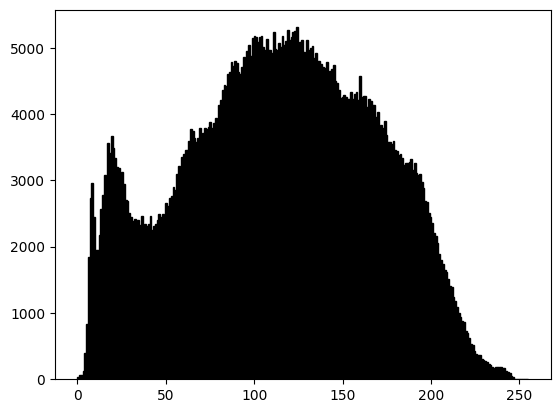

In [5]:
plt.hist(face.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')

[[ 95 108 120 ...  99 107 114]
 [ 69  86 102 ...  98 111 121]
 [ 56  73  90 ...  99 111 120]
 ...
 [ 81  85  96 ... 120 119 119]
 [ 78  86 100 ... 119 118 118]
 [ 78  88  99 ... 118 117 116]]


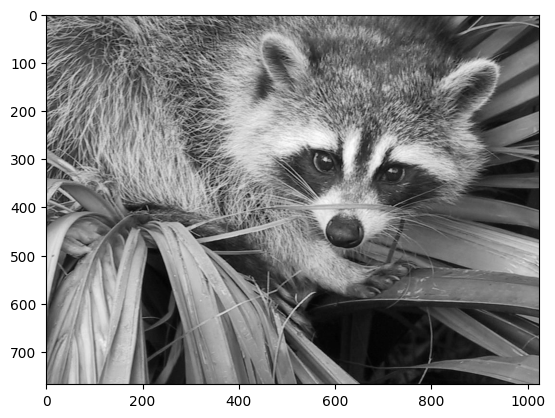

In [11]:
compressed = face / 1.2
compressed = np.floor(compressed)
compressed = compressed.astype(np.uint8)
print(compressed)
plt.imshow(compressed, cmap=plt.cm.gray)

(array([9.5000e+01, 5.7000e+01, 1.3000e+02, 3.9200e+02, 8.3900e+02,
        4.5680e+03, 2.9630e+03, 2.4530e+03, 1.9440e+03, 1.9550e+03,
        4.7430e+03, 2.7750e+03, 3.0730e+03, 2.9730e+03, 3.5650e+03,
        7.0710e+03, 3.4910e+03, 3.3390e+03, 3.2010e+03, 3.1880e+03,
        6.1980e+03, 2.9450e+03, 2.7090e+03, 2.6900e+03, 2.5090e+03,
        4.8320e+03, 2.4200e+03, 2.3560e+03, 2.4050e+03, 2.3250e+03,
        4.7880e+03, 2.3480e+03, 2.3140e+03, 2.3410e+03, 2.4550e+03,
        4.5670e+03, 2.3350e+03, 2.3970e+03, 2.4860e+03, 2.4450e+03,
        4.9560e+03, 2.6530e+03, 2.6170e+03, 2.7310e+03, 2.7670e+03,
        5.7580e+03, 3.0990e+03, 3.2090e+03, 3.1890e+03, 3.3580e+03,
        6.8540e+03, 3.4600e+03, 3.5890e+03, 3.7680e+03, 3.7420e+03,
        7.2220e+03, 3.6390e+03, 3.7820e+03, 3.6560e+03, 3.7170e+03,
        7.5560e+03, 3.8010e+03, 3.8800e+03, 3.7900e+03, 3.8590e+03,
        7.8360e+03, 4.1330e+03, 4.2100e+03, 4.3570e+03, 4.4420e+03,
        9.0290e+03, 4.6370e+03, 4.7820e+03, 4.72

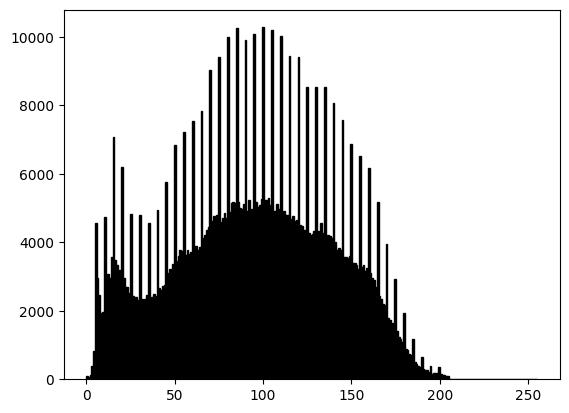

In [12]:
plt.hist(compressed.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')

In [13]:
compressed

array([[ 95, 108, 120, ...,  99, 107, 114],
       [ 69,  86, 102, ...,  98, 111, 121],
       [ 56,  73,  90, ...,  99, 111, 120],
       ...,
       [ 81,  85,  96, ..., 120, 119, 119],
       [ 78,  86, 100, ..., 119, 118, 118],
       [ 78,  88,  99, ..., 118, 117, 116]], dtype=uint8)

In [29]:
def compress_image (arr: np.ndarray, n: int) -> np.ndarray:
    result = np.zeros(shape=(int(arr.shape[0] / n), int(arr.shape[1] / n)))

    for idx, x in np.ndenumerate(result):
        lst = arr[idx[0] * n: (idx[0] + 1) * n, idx[1] * n: (idx[1] + 1) * n]
        result[idx] = np.median(lst)

    return result


    # for row in arr.shape[0]:
    #     for col in arr.shape[1]:
    #         arr[row, col] = arr[row, col] / 1.2

result = compress_image(face, 10)

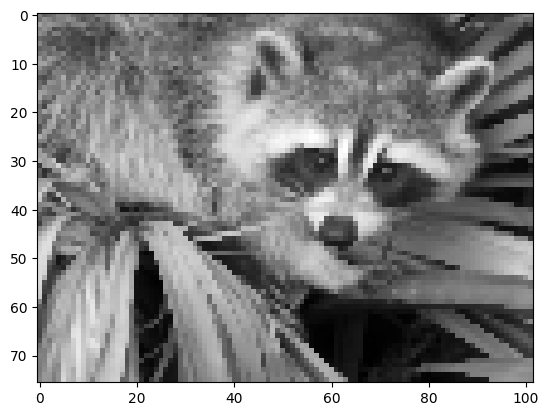

In [30]:
plt.imshow(result, cmap=plt.cm.gray)

(array([ 0.,  0.,  0.,  0.,  0.,  3., 16., 24., 37., 16., 20.,  9., 13.,
        24., 23., 38., 34., 25., 39., 40., 31., 26., 20., 32., 35., 23.,
        35., 25., 18., 26., 12., 18., 20., 22., 25., 21., 20., 19., 15.,
        19., 23., 17., 25., 19., 15., 24., 19., 20., 21., 25., 23., 16.,
        18., 16., 28., 23., 19., 36., 32., 29., 27., 29., 35., 36., 37.,
        33., 33., 26., 25., 41., 34., 25., 40., 36., 32., 34., 32., 38.,
        37., 41., 38., 34., 47., 49., 51., 48., 43., 64., 52., 46., 35.,
        47., 60., 49., 49., 54., 74., 55., 48., 51., 56., 51., 79., 54.,
        61., 59., 50., 57., 63., 55., 54., 78., 56., 50., 56., 72., 59.,
        48., 63., 59., 52., 61., 63., 79., 62., 61., 42., 38., 60., 66.,
        58., 44., 49., 53., 60., 44., 51., 51., 52., 50., 47., 45., 39.,
        53., 41., 46., 53., 42., 49., 63., 42., 37., 47., 34., 43., 37.,
        36., 40., 49., 34., 51., 37., 47., 41., 46., 42., 51., 41., 39.,
        44., 32., 35., 36., 35., 48., 35., 28., 38.

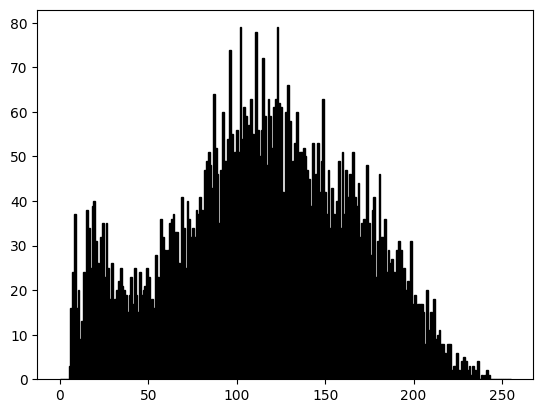

In [31]:
plt.hist(result.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')

In [34]:
np.mean(face)

113.48026784261067

In [35]:
np.mean(result)

114.03624871001033

In [36]:
np.diff(face)

array([[ 16,  15,   2, ...,   3,  10,   8],
       [ 21,  19,   7, ...,   9,  16,  12],
       [ 20,  21,   7, ...,  12,  15,  11],
       ...,
       [  5,  13,  15, ..., 255, 255,   0],
       [ 10,  16,  11, ..., 255, 255,   0],
       [ 12,  13,   8, ..., 255, 255, 255]], dtype=uint8)

In [37]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

ValueError: operands could not be broadcast together with shapes (768,1024) (76,102) 